# 内置序列类型概览

## 容器序列
list tuple collections.deque,可以存放不同类型的的数据
## 扁平序列
str bytes bytearray memoryview array.array ，只能容纳一种类型

按能否被修改来分类
## 可变序列(Mutable Sequence)
list 、 bytearray 、 array.array 、 collections.deque 、 memoryview
## 不可变序列(Sequence)
tuple 、 str 、 bytes

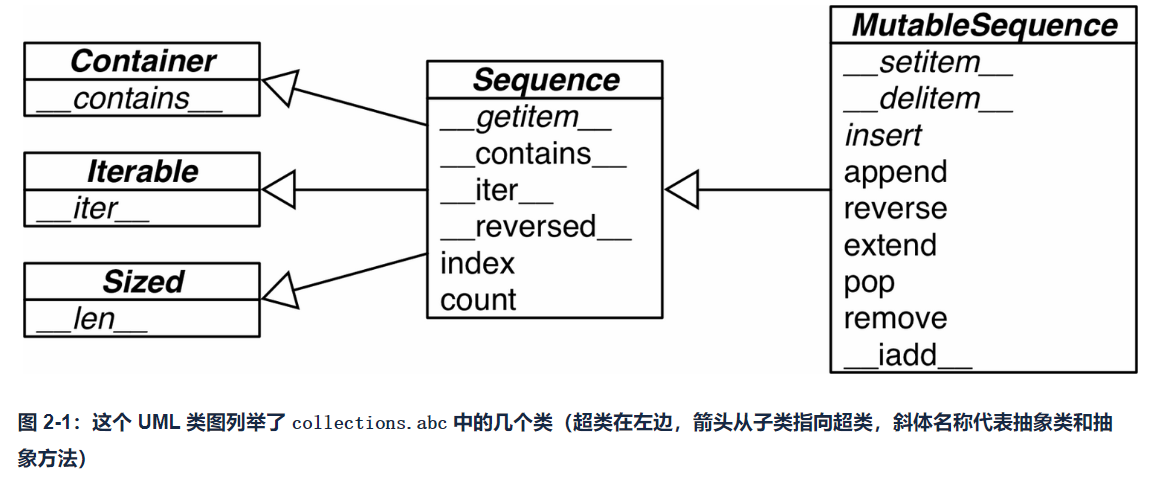

In [4]:
a[0] = 1

In [13]:
ord('@')

64

## 列表推导

In [15]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

##

## 生成器表达式

逐个产出元素，而不是先建立一个完整的列表，可以节省空间。

用圆括号代替方括号。

In [17]:
((color, size) for color in colors for size in sizes)

<generator object <genexpr> at 0x000001F6B4E60120>

In [18]:
[(color, size) for color in colors for size in sizes]

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [23]:
sorted((2, 3))

[2, 3]

In [25]:
divmod(20, 8)

(2, 4)

# 元组

用*运算符把一个可迭代对象拆开作为函数的参数

In [26]:
a = (20, 8)

In [30]:
b = [20, 8]

In [31]:
divmod(*a)  # divmod(x, y)为内置函数，返回 商和余数

(2, 4)

In [32]:
divmod(*b)

(2, 4)

### 嵌套元组拆包

In [37]:
metro_areas = [
    ('Tokyo','JP',36.933,(35.689722,139.691667)),
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas:  # 嵌套元组拆包
    if longitude <= 0: 
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


### 具名元组

In [40]:
from collections import namedtuple


City = namedtuple('City', 'name country population coordinates')

beijing = City('Beijing', 'CN', '160b', '35, 68')

In [41]:
beijing

City(name='Beijing', country='CN', population='160b', coordinates='35, 68')

In [42]:
beijing.population

'160b'

In [45]:
beijing._fields

('name', 'country', 'population', 'coordinates')

### 切片

In [51]:
# 可以命名切片并且调用
SKIP = slice(0,10,2)

In [52]:
'123456789'[SKIP]

'13579'

In [53]:
'123456789'[::2]

'13579'

In [58]:
t = (1, 2, [3, 4])
t[2] += [50, 60]

TypeError: 'tuple' object does not support item assignment

In [59]:
t

(1, 2, [3, 4, 50, 60])

### list.sort()方法和内置函数sorted()

- list.sort() 就地排列列表，不会复制一份
- sorted() 会新建**列表**作为返回值，这个方法可以接受任何可迭代对象，但都会返回一个列表

两者的可选关键词 reverse、key

In [63]:
fruits = ['apple', 'orange', 'Banana', 'pear']

In [65]:
sorted(fruits)  # 按首字母排序

['Banana', 'apple', 'orange', 'pear']

In [67]:
fruits  # 重新生成了一个列表，原列表保持不变

['apple', 'orange', 'Banana', 'pear']

In [69]:
sorted(fruits, reverse=True)  # 倒序

['pear', 'orange', 'apple', 'Banana']

In [70]:
sorted(fruits, key=len)  # 按长度排序

['pear', 'apple', 'orange', 'Banana']

In [71]:
sorted(fruits, key=len, reverse=True)

['orange', 'Banana', 'apple', 'pear']

In [73]:
names = ('jack', 'tom', 'Helen', 'harry')
sorted(names, key=str.lower)  #  元组排序也返回列表，按首字母小写排序

['harry', 'Helen', 'jack', 'tom']

In [78]:
beauties = ['candice', 'Yoona', 'Yifei', 'baby', ]

In [79]:
beauties.sort()

In [81]:
beauties  # 就地排序

['Yifei', 'Yoona', 'baby', 'candice']

## 数组 Array

In [82]:
from array import array

In [83]:
from random import random

In [104]:
float_array = array('d', (random() for i in range(10)))

补充说明‘d’的类型码
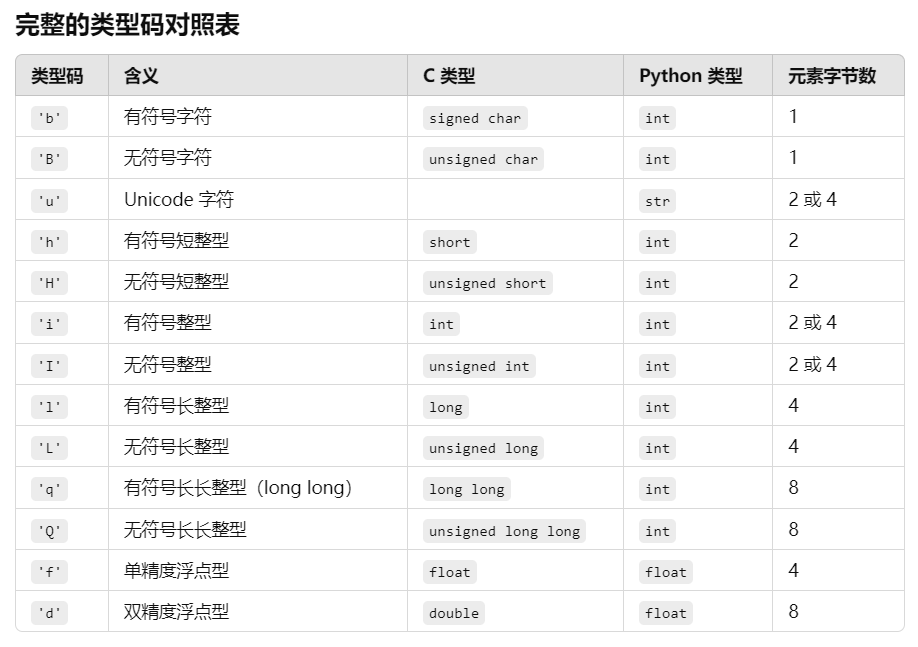

In [85]:
float_array

array('d', [0.7934737879270561, 0.5556749658381145, 0.3815182617274643, 0.7314751625021122, 0.5070560502864464, 0.7100397308074934, 0.6151594781013546, 0.7469992427288292, 0.8503600383090056, 0.9230738650807153])

In [86]:
float_array[-1]

0.9230738650807153

In [89]:
fp = open('float_array.bin', 'wb')
float_array.tofile(fp)  # 把数组存入二进制文件里

In [94]:
with open('float_array.bin', 'rb') as file_handle:
    data = file_handle.read()
    print(len(data))  # 每个浮点数占用8个字节，不需要额外空间
    print(data)

80
b"\x84(,$#d\xe9?;a\xaf\xdd\x16\xc8\xe1?\xfe\x8e<\x92\xcbj\xd8?+\r\x99\x99>h\xe7?\xd7\x03'\x9c\xcd9\xe0?\xf5\xb8\xd5=\xa5\xb8\xe6?\xc3\xa1\x08\xeeb\xaf\xe3?\xdc\x06\xb5\xf4j\xe7\xe7?}\x99KA&6\xeb?2\x0c\xca3\xd2\x89\xed?"


In [95]:
fp2 = open('float_array.bin', 'rb')

In [96]:
float_array1 = array('d')

In [97]:
float_array1.fromfile(fp2, 10)

In [98]:
float_array1

array('d', [0.7934737879270561, 0.5556749658381145, 0.3815182617274643, 0.7314751625021122, 0.5070560502864464, 0.7100397308074934, 0.6151594781013546, 0.7469992427288292, 0.8503600383090056, 0.9230738650807153])

In [99]:
float_array1 == float_array

True

In [100]:
float_array.tobytes()

b"\x84(,$#d\xe9?;a\xaf\xdd\x16\xc8\xe1?\xfe\x8e<\x92\xcbj\xd8?+\r\x99\x99>h\xe7?\xd7\x03'\x9c\xcd9\xe0?\xf5\xb8\xd5=\xa5\xb8\xe6?\xc3\xa1\x08\xeeb\xaf\xe3?\xdc\x06\xb5\xf4j\xe7\xe7?}\x99KA&6\xeb?2\x0c\xca3\xd2\x89\xed?"

In [101]:
float_array.tolist()

[0.7934737879270561,
 0.5556749658381145,
 0.3815182617274643,
 0.7314751625021122,
 0.5070560502864464,
 0.7100397308074934,
 0.6151594781013546,
 0.7469992427288292,
 0.8503600383090056,
 0.9230738650807153]

In [103]:
sorted(float_array)

[0.3815182617274643,
 0.5070560502864464,
 0.5556749658381145,
 0.6151594781013546,
 0.7100397308074934,
 0.7314751625021122,
 0.7469992427288292,
 0.7934737879270561,
 0.8503600383090056,
 0.9230738650807153]

### 双向队列

In [105]:
from collections import deque

In [107]:
dq = deque(range(10), maxlen=10)  # maxlen可选参数，表示队列可容纳元素的数量，不能修改

In [108]:
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)

In [109]:
dq.rotate(3)

In [110]:
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6], maxlen=10)

In [111]:
dq.rotate(-4)

In [112]:
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0], maxlen=10)

In [113]:
dq.appendleft(-1)

In [114]:
dq

deque([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)

In [115]:
dq.append(10)

In [116]:
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], maxlen=10)

In [117]:
dq.extend([11, 12, 13])

In [118]:
dq

deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], maxlen=10)

In [119]:
dq.extendleft([10, 20, 30, 40])  # 注意元素出现的顺序，extendleft(iter)方法会把迭代器里的元素逐个添加到双向队列的左边，因此会逆序出现。

In [120]:
dq

deque([40, 30, 20, 10, 4, 5, 6, 7, 8, 9], maxlen=10)

In [1]:
a = 17.935
((a-1.63) * 682 + (a-0.85) * 250) * 7.2 * 0.8

88653.65759999999

In [4]:
import time
from datetime import datetime

# 示例：Linux 时间戳（Unix 时间，单位为秒）
timestamp = 1736149974  # 示例时间戳

# 方法 1：使用 time 模块
time_struct = time.localtime(timestamp)  # 将时间戳转为本地时间结构
formatted_time_time = time.strftime("%Y-%m-%d %H:%M:%S", time_struct)
print("使用 time 模块:", formatted_time_time)

# 方法 2：使用 datetime 模块
dt_object = datetime.fromtimestamp(timestamp)  # 将时间戳转为 datetime 对象
formatted_time_datetime = dt_object.strftime("%Y-%m-%d %H:%M:%S")
print("使用 datetime 模块:", formatted_time_datetime)


使用 time 模块: 2025-01-06 15:52:54
使用 datetime 模块: 2025-01-06 15:52:54


In [6]:
16+5+10+7+2+300*3+4+6+1+2+1+1+1+6+2+4+1+1+4+2+4+1+2+1+32

1016

In [29]:
import numpy as np
a = np.ndarray([(0), (0)], dtype=([('a', 'u1')]))
b = np.ndarray([1, 2], dtype=([('b', 'u1')]))

In [19]:
from numpy.lib.recfunctions import merge_arrays
merge_arrays([a, b], flatten=True)

array([( 40, 120), (116, 116)], dtype=[('a', 'u1'), ('b', 'u1')])

In [30]:
a

array([], shape=(0, 0), dtype=[('a', 'u1')])

In [9]:
4 * 12 + 8

56

In [11]:
360/16

22.5

In [13]:
-1 % 3

2

In [8]:
73.2+73.9+30.5+74.4+32.4+32.5+32.8+73.7+74.9+74.4+73.9+74.5+73.6+32.4+74.6+73.8

975.5

In [22]:
16+26+7+19

68

In [36]:
13 / 75000

0.00017333333333333334

In [37]:
1843200 / 2

921600.0

In [38]:
192 * (120/0.25)

92160.0

In [40]:
(153600 * 100 - 264) / (153600 * 100)

0.9999828125

In [41]:
120 / 0.25 * 192


92160.0

In [43]:
32.5+32.9+32.4+32.4+32.4+73.6+32.5+32.5+32.6+32.4+32.3+32.5+74.6+73.1+73.6

652.3000000000001